In [1]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt

In [2]:
images = glob.glob('../images/*')
images

['../images/rapper-grocers.jpg',
 '../images/partial-silken.jpg',
 '../images/Winters-identity.jpg',
 '../images/bluffed-acclaiming.jpg',
 '../images/lineage-irresolutely.jpg',
 '../images/vanished-normalizing.jpg',
 '../images/derogate-iffiest.jpg',
 '../images/press-selflessly.jpg',
 '../images/caribou-transcribe.jpg',
 '../images/bruin-approachable.jpg',
 '../images/episodes-Olympia.jpg']

In [3]:
def extract_features(img_path):
    img = cv2.imread(img_path)
    
    features = []
    features.append(average_hsvs(img))
    features.append(average_rgbs(img))
    features.append(gabor_filters(img))
    return features

def gabor_filters(img):
    # Applies several Gabor filters with varied hyperparameters
    filtered_images = []
    num_filters = 16
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    for i in range(num_filters):
        # Gets kernel with specified parameters
        kernel = cv2.getGaborKernel((15, 15), 3, np.pi * i / num_filters, 10, 0.5, 0)
        # Normalization
        kernel /= kernel.sum() * 1.0
        # Apply filter        
        filtered = cv2.filter2D(img, -1, kernel)
        
        filtered_images.append(filtered)

    filters = np.array(filtered_images)
    img = filters.sum(axis=0)
    return cv2.resize(img.astype('float32'), None, fx=0.1, fy=0.1)

def average_hsvs(img):
    # Convert to hsv
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Averages for each of h, s, and v
    averages = [np.mean(img[:, :, i]) for i in range(3)]
    return averages

def average_rgbs(img):
    averages = [np.mean(img[:, :, i]) for i in range(3)]
    return averages
    
#print(extract_features("images/bluffed-acclaiming.jpg"))

In [4]:
features = [extract_features(img) for img in images]

In [5]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=.1)

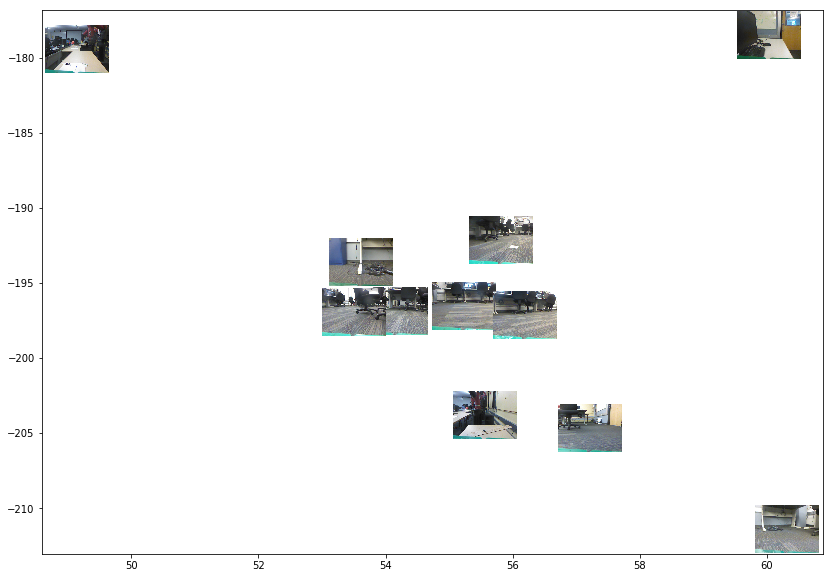

In [6]:
fig = plt.figure(figsize=(14, 10))
ax = plt.axes()

rgb = [rgb for (hsv, rgb, gabor) in features]

u, e, vt = np.linalg.svd(rgb)
axes = vt.T[:2]

for img, r in zip(images, rgb):
    pt = axes @ r
    
    ax.scatter(*pt)
    ab = AnnotationBbox(getImage(img), pt, frameon=False)
    ax.add_artist(ab)

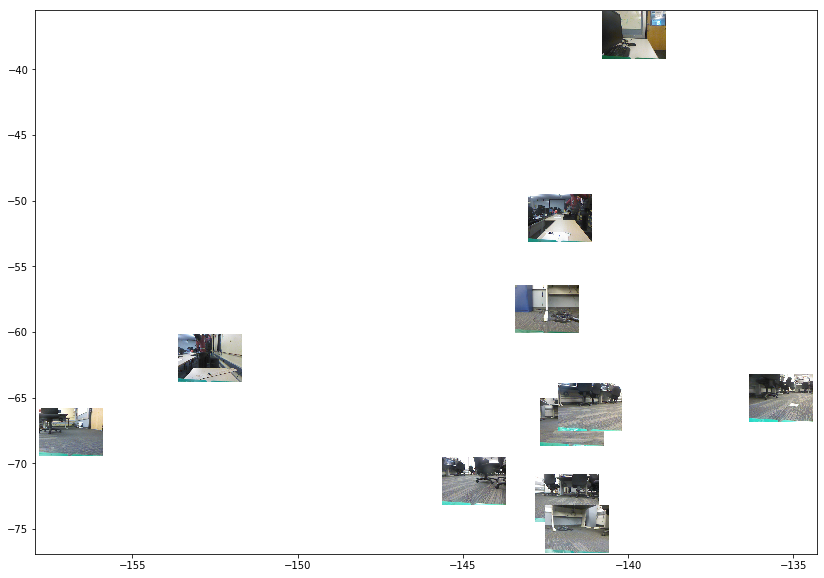

In [7]:
fig = plt.figure(figsize=(14, 10))
ax = plt.axes()

hsv = [hsv for (hsv, rgb, gabor) in features]

u, e, vt = np.linalg.svd(hsv)
axes = vt.T[:2]

for img, r in zip(images, hsv):
    pt = axes @ r
    
    ax.scatter(*pt)
    ab = AnnotationBbox(getImage(img), pt, frameon=False)
    ax.add_artist(ab)

(3072,)


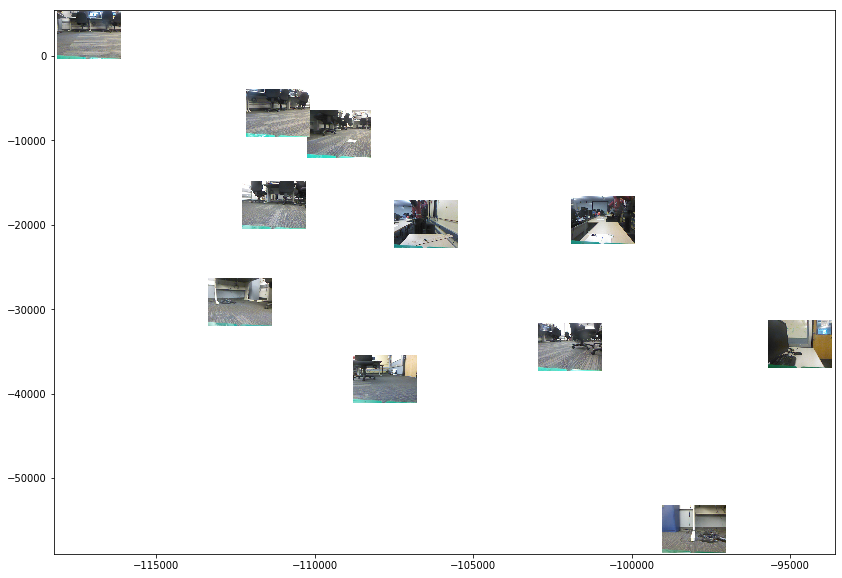

In [8]:
fig = plt.figure(figsize=(14, 10))
ax = plt.axes()

gabor = [gabor.ravel() for (hsv, rgb, gabor) in features]
print(gabor[0].shape)

u, e, vt = np.linalg.svd(gabor)
axes = vt.T[:2]

for img, r in zip(images, gabor):
    pt = axes @ r
    
    ax.scatter(*pt)
    ab = AnnotationBbox(getImage(img), pt, frameon=False)
    ax.add_artist(ab)

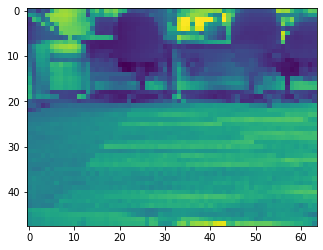

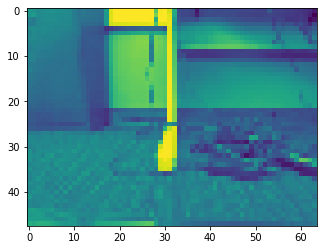

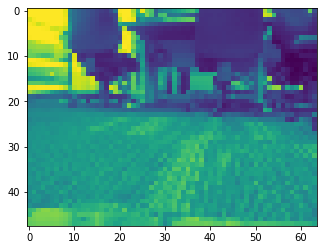

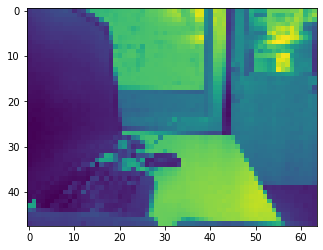

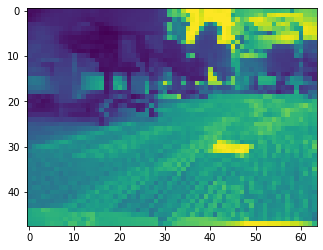

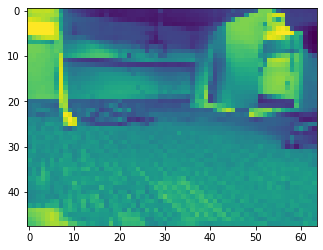

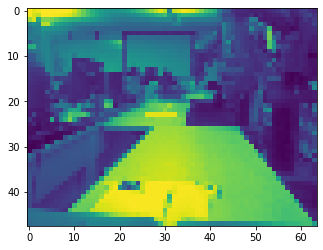

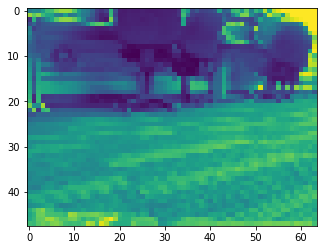

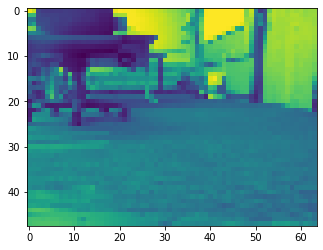

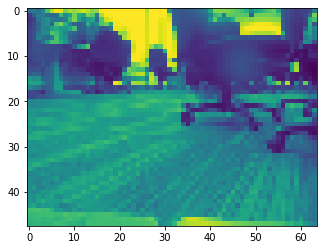

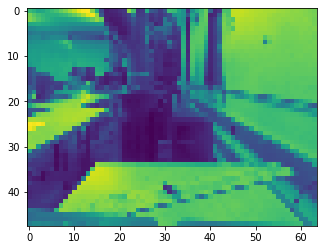

In [9]:
gabor = [gabor for (hsv, rgb, gabor) in features]
for g in gabor:
    plt.imshow(g)
    plt.show()
